In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def get_data(text_file: str) -> None:
    data=pd.DataFrame()
    time=[]
    with open (text_file, "r") as f:
        lines = f.readlines()

        #TODO : change this lable to your first label 
        previous_label=1
        for i,line in enumerate(lines):
            line=line.split(" ")

            if len(line) !=5:
                continue

            new_label=float(line[0])


            if new_label == previous_label:
                time.append(float(line[-2]))
            else:
                # set time:
                data[previous_label]=time
                # reset time
                time=[]
                time.append(float(line[-2]))
                # update previous_label
                previous_label=new_label

        data[new_label]=time

        f.close()

    return data

,1,2,3,4,5,6,7,8
0,0.062156,0.061617,0.060824,0.061675,0.096446,0.098078,0.099503,0.099798
1,0.002768,0.001761,0.001445,0.001292,0.001704,0.001690,0.001646,0.001567
2,0.001723,0.000872,0.000669,0.000465,0.000536,0.000498,0.000442,0.000392
3,0.001569,0.000842,0.000564,0.000434,0.000568,0.000472,0.000414,0.000375
4,0.001602,0.000807,0.000553,0.000429,0.000524,0.000478,0.000421,0.000343
5,0.001604,0.000808,0.000547,0.000431,0.000373,0.000480,0.000434,0.000342
6,0.001595,0.000814,0.000549,0.000432,0.000380,0.000473,0.000420,0.000340
7,0.001068,0.000528,0.000354,0.000287,0.000367,0.000336,0.000291,0.000267
8,0.001293,0.000610,0.000551,0.000330,0.000468,0.000369,0.000378,0.000335
9,0.001578,0.000739,0.000493,0.000389,0.000365,0.000403,0.000352,0.000285


In [104]:
def build_data(build_path) -> tuple:
    files=['/duration_scatter.txt',
           '/duration_gather.txt',
           '/duration_convert_to_tensor.txt',
           '/duration_convert_to_array.txt',
           '/duration_predict.txt'
            ]
    folders=['LR',
             'MLR',
             'nonLR']
    
    data_all=list()
    data=pd.DataFrame()
    for folder in folders: 
        for i, file in enumerate(files): 
            path=build_path+folder+file
            if i==0:
                data = get_data(path)
                index=data.shape[0]
            else:
                #get data from file
                df = get_data(path)
                df.index=np.arange(index,df.shape[0]+index)
                data=pd.concat([data,df])
                # new value of index: 
                index=index+df.shape[0]
        data_all.append(data)

    return data_all



def build_graph(data: tuple):
    # affichage settings: ----------------------
    # plt.style.use('default')

    SMALL_SIZE = 8
    MEDIUM_SIZE = 10


    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)     # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)   # fontsize of the figure title


    message1="coût convertion de données"
    message2="temps de réponse par proc"


    names=['LR','MLR','nonLR']
    lables=['scatter','gather','conv_to_tensor','conv_to_array']
    
    # TODO : we can change the number of calls [0,10]
    fct_call_number_to_plt=10

    #--------------------------------------------


    fig, axes= plt.subplots(3,2,figsize=(20,12))

    for k in range(3):
        for i in range(0,4):
            axes[k][0].plot(data[k].iloc[i,:].to_list(),marker='^', label=f"{lables[i]}")
            axes[k][0].set_title(f"inference CPU MPI : modèle {names[k]} - {message1}")
            if k==2: axes[k][0].set_xlabel("number of procs")
            #else: axes[k][0].axes.xaxis.set_visible(False)
            # axes.set_xscale('log')
            axes[k][0].set_yscale('log')
            axes[k][0].set_ylabel("time (secondes)")

            axes[k][0].grid(True,which="both", linestyle='--')
            axes[k][0].legend()


        for i in range(0,fct_call_number_to_plt):
            axes[k][1].plot(data[k].columns,data[k].iloc[i+4,:].to_list(),marker='^', label=f"appel n°: {i}")
            axes[k][1].set_title(f"inference CPU MPI : modèle {names[k]} - {message2}")
            if k==2: axes[k][1].set_xlabel("number of procs")
            #else: axes[k][1].axes.xaxis.set_visible(False)
            # axes.set_xscale('log')
            axes[k][1].set_yscale('log')
            axes[k][1].set_ylabel("time (secondes)")

            axes[k][1].grid(True,which="both", linestyle='--')
            axes[k][1].legend()

        

    plt.show()
    #fig.savefig("icons/inference_cpu_scaling_benchmark.png")
    print("fin sauvegarde")


def compute_factor(data_tuple: list) -> list:
    delta=[]
    for data_torch in data_tuple:
        row=data_torch.shape[0]
        col=data_torch.shape[1]-1

        scale=[data_torch.columns[j+1]-data_torch.columns[j-1] for j in range(1,col)]

        # initialize dicts:
        data={scale[j]:[] for j in range(0,col-1)}


        for i in range(row):
            for j in range(1,col):
                r=(data_torch.iloc[i , j+1]-data_torch.iloc[i , j-1])/2
                data[scale[j-1]].append(r)

        df_data=pd.DataFrame.from_dict(data)

        delta.append(df_data)

    return delta

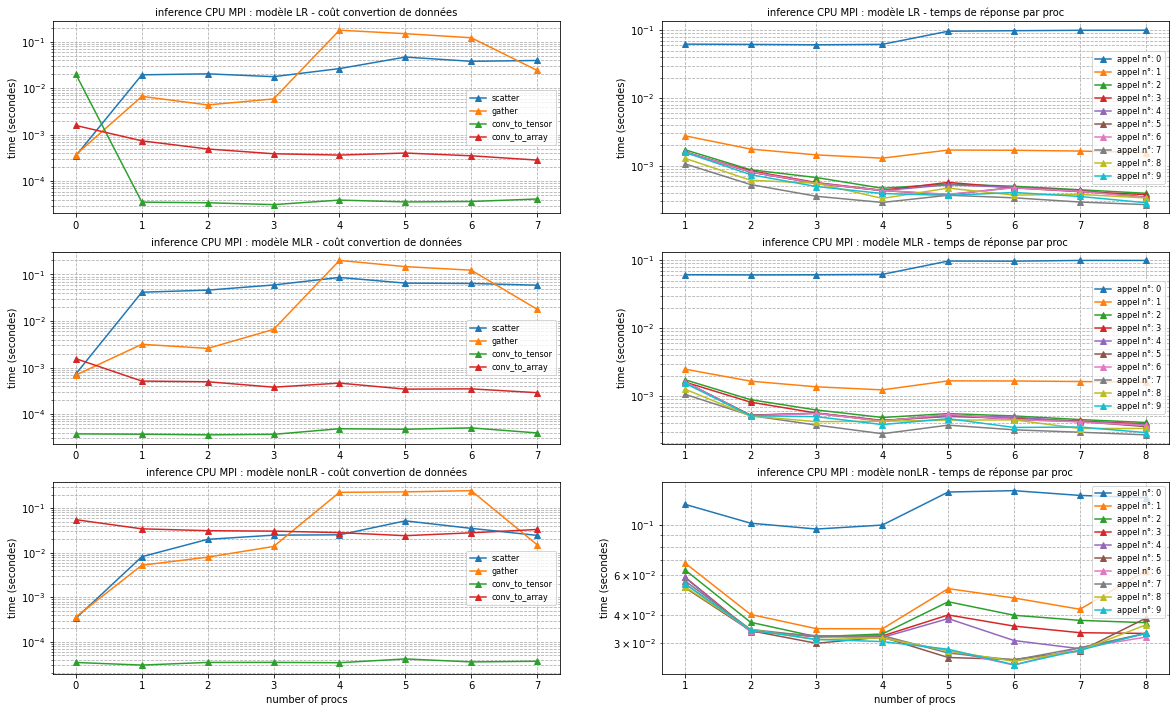

fin sauvegarde


In [105]:
# build data frame from data files:
data=build_data('build/')

# build scalability  graph:-----
build_graph(data)


In [111]:
len(delta_data)

3